In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
data.rename(columns={'Temperature (K)': 'temperature', 'Luminosity(L/Lo)' :'luminosity', 'Radius(R/Ro)':'radius', 'Absolute magnitude(Mv)': 'absolute_magnitude', 'Star type': 'star_type', 'Star color': 'star_color', 'Spectral Class':'spectral_class' }, inplace=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
category = 'species'
data_train, data_test = train_test_split(data, test_size=0.3,  random_state=42)
print(data_train.shape, data_test.shape)

(168, 7) (72, 7)


In [6]:
data.corr()

,temperature,luminosity,radius,absolute_magnitude,star_type
temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
luminosity,0.393404,1.000000,0.526516,-0.692619,0.676845
radius,0.064216,0.526516,1.000000,-0.608728,0.660975
absolute_magnitude,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
star_type,0.411129,0.676845,0.660975,-0.955276,1.000000


In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
properties = ['temperature', 'luminosity', 'absolute_magnitude']
dt_regression = DecisionTreeRegressor(max_depth = 4)
dt_regression.fit(data_train[properties], data_train['radius'])

DecisionTreeRegressor(max_depth=4)

In [9]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [10]:
predictionsOnTrainset = dt_regression.predict(data_train[properties])
predictionsOnTestset = dt_regression.predict(data_test[properties])

rmseTrain = calculate_rmse(predictionsOnTrainset, data_train.radius)
rmseTest = calculate_rmse(predictionsOnTestset, data_test.radius)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 59.04510831052556
RMSE on test set 108.59633305361868


In [11]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

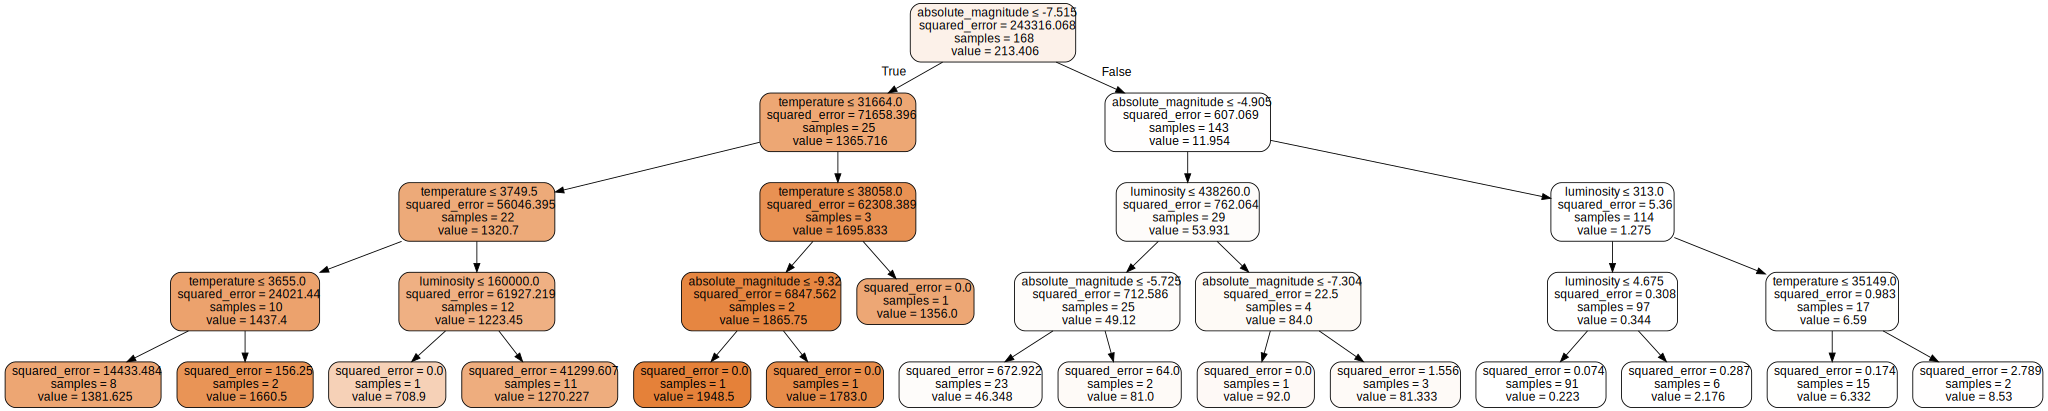

In [12]:
plot_tree_regression(dt_regression, properties)